In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/SMAI/Assignment1
!pwd

Mounted at /content/drive
/content/drive/MyDrive/SMAI/Assignment1
/content/drive/MyDrive/SMAI/Assignment1


**INSTRUCTIONS**



1.  The assignment contains four questions. A few bonus questions are mentioned. 
2.   This assignment is due on **6th Feb, 23:59 **(**No Further extensions**).
3.   Assignment must be implemented in Python 3 only.
4.   You are allowed to use libraries for data preprocessing (numpy, pandas etc) and for evaluation metrics, data visualization (matplotlib etc.).
5.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
6.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
7.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
8.   Any attempts at **plagiarism will be penalized heavily**.
9.   Make sure you run and save your notebooks before submission.
10.  For question 3 of the Decision Trees section, output your model's depth first traversal into ```outputimp.txt``` and submit it along with the ipynb file.
10. Naming convention for the ipynb file is ```<roll_number>_assign1.ipynb```
11. Compress your submission files into a zip file with the naming convention: ```<roll_number>_assign1.zip``` and submit in the portal.

#**1) REGRESSION**

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# To read data from diamonds.csv
'''To read data from diamonds.csv'''
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('Regression_Diamonds_data/diamonds.csv', na_values=np.NaN,    
         header=None,  names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]

'''Check for NaNs'''
for h in headers:
    print(h,"NaN :",data[h].isnull().sum())
    
'''Convert categorical attributes to numeric'''
cat_to_num = {"cut":{"Fair":0, "Good":1, "Very Good":2, "Premium":3, "Ideal":4}, 
              "clarity":{"I1":0, "SI2":1, "SI1":2, "VS2":3, "VS1":4, "VVS2":5, "VVS1":6, "IF":7},
              "color":{"J":0, "I":1, "H":2, "G":3, "F":4, "E":5, "D":6}}
data = data.replace(cat_to_num)

'''Convert data to float'''
for h in headers:
    data[h] = pd.to_numeric(data[h],downcast='float')
print(data.head())

carat NaN : 0
cut NaN : 0
color NaN : 0
clarity NaN : 0
depth NaN : 0
table NaN : 0
price NaN : 0
x NaN : 0
y NaN : 0
z NaN : 0
   carat  cut  color  clarity      depth  table  price     x     y     z
1   0.23  4.0    5.0      1.0  61.500000   55.0  326.0  3.95  3.98  2.43
2   0.21  3.0    5.0      2.0  59.799999   61.0  326.0  3.89  3.84  2.31
3   0.23  1.0    5.0      4.0  56.900002   65.0  327.0  4.05  4.07  2.31
4   0.29  3.0    1.0      3.0  62.400002   58.0  334.0  4.20  4.23  2.63
5   0.31  1.0    0.0      1.0  63.299999   58.0  335.0  4.34  4.35  2.75


In [ ]:
'''Separating X & y'''
X = np.array(data.drop('price', axis=1))
y = np.array(data.price)
print(len(X))
print(len(y))

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

'''Standardize X'''
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_org)
X_test_std = scaler.transform(X_test_org)

'''Norm L1'''
normer = Normalizer(norm='l1')
X_train_nl1 = normer.fit(X_train_org).transform(X_train_org)
X_test_nl1 = normer.fit(X_test_org).transform(X_test_org)

'''Norm L2'''
normer = Normalizer(norm='l2')
X_train_nl2 = normer.fit(X_train_org).transform(X_train_org)
X_test_nl2 = normer.fit(X_test_org).transform(X_test_org)

'''Norm Lmax'''
normer = Normalizer(norm='max')
X_train_nlmax = normer.fit(X_train_org).transform(X_train_org)
X_test_nlmax = normer.fit(X_test_org).transform(X_test_org)


print('\n',X_train_org[:3])
print('\n',X_train_std[:3])
print('\n',X_train_nl1[:3])
print('\n',X_train_nl2[:3])
print('\n',X_train_nlmax[:3])

53940
53940

 [[ 0.41  4.    4.    6.   62.3  53.    4.8   4.77  2.98]
 [ 1.12  3.    4.    1.   60.5  59.    6.79  6.73  4.09]
 [ 0.42  4.    4.    4.   60.6  56.    4.83  4.87  2.94]]

 [[-0.8137994   0.98088133  0.34862092  1.7869023   0.38608253 -1.9910904
  -0.8248175  -0.8347238  -0.784375  ]
 [ 0.678822    0.08326726  0.34862092 -1.2481686  -0.8709732   0.689861
   0.9442779   0.8664688   0.7792566 ]
 [-0.7927766   0.98088133  0.34862092  0.57287383 -0.80113786 -0.65061474
  -0.7981479  -0.7479283  -0.840722  ]]

 [[0.00288205 0.02811753 0.02811753 0.0421763  0.43793055 0.3725573
  0.03374104 0.03353016 0.02094756]
 [0.00765917 0.02051563 0.02735417 0.00683854 0.4137318  0.403474
  0.0464337  0.04602339 0.02796964]
 [0.00296485 0.02823662 0.02823662 0.02823662 0.4277848  0.3953127
  0.03409572 0.03437809 0.02075392]]

 [[0.00496719 0.04846036 0.04846036 0.07269054 0.75477004 0.64209974
  0.05815243 0.05778898 0.03610297]
 [0.01312964 0.03516869 0.04689158 0.0117229  0.70923513 0



```
# This is formatted as code
```

**KNN Regression [Diamond Price Prediction Dataset]**

1. a) Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

In [ ]:
# code for knn regression

Ks_list = [2,3,5,7,9,11,13,16]

'''Minkowski distance function'''
def minkowski_dist(test_pt, train_X, p):
    # test_pt = np.array(test_pt)
    # train_X = np.array(train_X)
    temp = abs(test_pt - train_X) 
    if p==2:
        return np.sqrt(np.sum(temp*temp,axis=1))
    if p==1:
        return np.sum(temp,axis=1)
    if p==0:
        temp = temp!=0
        return np.sum(temp*1,axis=1)

max_nn = 25 #only 25 smallest distances

def cal_all_dists(train_X,test_X,p):
    all_dists = [] 
    # train_Xnp = np.array(train_X)
    # test_X = np.array(test_X)
    for i in range(test_X.shape[0]):
        cur_dists = minkowski_dist(test_X[i],train_X,p)
        idx = np.argpartition(cur_dists, max_nn)[:max_nn]
        cur_dists = cur_dists[idx]
        # idx_df = [train_X.iloc[j].name for j in idx]
        df_cur_dists = pd.DataFrame(data=cur_dists, columns=['dist'], index=idx)
        df_cur_dists = df_cur_dists.sort_values(by=['dist'], axis=0)
        all_dists.append(df_cur_dists)
    return all_dists

'''criterion = 0:simple_mean, 1:weighted_mean'''
def knn_predict(test_X,all_dists,k,metric=1):
    predictions = []
    # c=0
    # for i in test_X.index:
    for c in range(test_X.shape[0]):
        knn_dists = all_dists[c][:k]
        # knn_ys = np.array([y_train.loc[j] for j in knn_dists.index])
        knn_ys = np.array([y_train[j] for j in knn_dists.index])
        knn_dists = np.array(knn_dists).reshape((k,))
        if metric==0:
            predictions.append(knn_ys.mean())
        else:
            if 0 in knn_dists:
                knn_ws = np.array(knn_dists==0, dtype=float)
            else:
                knn_ws = 1/knn_dists
            predictions.append(np.sum(knn_ys * knn_ws)/np.sum(knn_ws))
        c+=1
    return predictions

1. b) Do we need to normalise data? [If so Does it make any difference?].

As KNN is a distance algorithm, it is affected by the range of features as it uses distances between the datapoints to determine their similarity. This way, the KNN can become biased towards a feature having higher magnitude. To avoid this, it is recommended to scale the data so that all features contribute equally to the outcome. Standardization and normalization are 2 ways to scale the data.

Standardization: Centering and scaling each feature independantly by subtracting the mean and dividing by the standard deviation such that the variance of the formed distribution becomes 1 and mean becomes 0

Normalization (SKlearn): Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.

Here, we observe that standardizing the data gives least error as it preserves the distance information within each feature and distorts the relative distances between the feature, which prevents the model from getting biased to a feature.

Here, normalization performs worse than the unprocessed data as each row is normalized separately, which removes the overall distance information both within and between the features


In [ ]:
allproc_score_dict = {}

'''Unprocessed org data'''
all_dists_org = cal_all_dists(X_train_org,X_test_org,2)
temp_dict = {}
for k in Ks_list:
    temp_dict[k] = {}
    y_pred = knn_predict(X_test_org,all_dists_org,k)
    temp_dict[k]['R-sqr'] = r2_score(y_test, y_pred)
    temp_dict[k]['MAE'] = mean_absolute_error(y_test, y_pred)
    temp_dict[k]['MSE'] = mean_squared_error(y_test, y_pred)
allproc_score_dict['org'] = temp_dict

'''Standardized data'''
all_dists_std = cal_all_dists(X_train_std,X_test_std,2)
temp_dict = {}
for k in Ks_list:
    temp_dict[k] = {}
    y_pred = knn_predict(X_test_std,all_dists_std,k)
    temp_dict[k]['R-sqr'] = r2_score(y_test, y_pred)
    temp_dict[k]['MAE'] = mean_absolute_error(y_test, y_pred)
    temp_dict[k]['MSE'] = mean_squared_error(y_test, y_pred)
allproc_score_dict['std'] = temp_dict

'''Normalized L1 data'''
all_dists_nl1 = cal_all_dists(X_train_nl1,X_test_nl1,2)
temp_dict = {}
for k in Ks_list:
    temp_dict[k] = {}
    y_pred = knn_predict(X_test_nl1,all_dists_nl1,k)
    temp_dict[k]['R-sqr'] = r2_score(y_test, y_pred)
    temp_dict[k]['MAE'] = mean_absolute_error(y_test, y_pred)
    temp_dict[k]['MSE'] = mean_squared_error(y_test, y_pred)
allproc_score_dict['nl1'] = temp_dict

'''Normalized L2 data'''
all_dists_nl2 = cal_all_dists(X_train_nl2,X_test_nl2,2)
temp_dict = {}
for k in Ks_list:
    temp_dict[k] = {}
    y_pred = knn_predict(X_test_nl2,all_dists_nl2,k)
    temp_dict[k]['R-sqr'] = r2_score(y_test, y_pred)
    temp_dict[k]['MAE'] = mean_absolute_error(y_test, y_pred)
    temp_dict[k]['MSE'] = mean_squared_error(y_test, y_pred)
allproc_score_dict['nl2'] = temp_dict

'''Normalized Max data'''
all_dists_nlmax = cal_all_dists(X_train_nlmax,X_test_nlmax,2)
temp_dict = {}
for k in Ks_list:
    temp_dict[k] = {}
    y_pred = knn_predict(X_test_nlmax,all_dists_nlmax,k)
    temp_dict[k]['R-sqr'] = r2_score(y_test, y_pred)
    temp_dict[k]['MAE'] = mean_absolute_error(y_test, y_pred)
    temp_dict[k]['MSE'] = mean_squared_error(y_test, y_pred)
allproc_score_dict['nlmax'] = temp_dict

print("Euclidean distance measure fixed for now")
print("\nOriginal Data")
display(pd.DataFrame(allproc_score_dict['org']))
print("\nStandardized Data")
display(pd.DataFrame(allproc_score_dict['std']))
print("\nNormalized L1 Data")
display(pd.DataFrame(allproc_score_dict['nl1']))
print("\nNormalized L2 Data")
display(pd.DataFrame(allproc_score_dict['nl2']))
print("\nMax Normalized Data")
display(pd.DataFrame(allproc_score_dict['nlmax']))

Euclidean distance measure fixed for now

Original Data


,2,3,5,7,9,11,13,16
R-sqr,0.946542,0.953260,0.958276,0.959730,0.960037,0.960285,0.960248,0.959450
MAE,469.890452,447.207527,424.582763,418.063603,415.668648,415.130779,414.668973,417.944052
MSE,830663.954018,726271.993608,648322.516231,625735.945699,620963.941357,617117.733170,617682.059395,630082.945982



Standardized Data


,2,3,5,7,9,11,13,16
R-sqr,0.964385,0.967989,0.969893,0.970123,0.970520,0.970580,0.970417,0.970230
MAE,385.660050,366.893483,354.000467,350.164939,348.987565,348.290196,349.525805,350.719304
MSE,553404.971184,497402.190567,467810.407937,464251.782630,458082.710579,457141.487616,459676.955288,462578.919953



Normalized L1 Data


,2,3,5,7,9,11,13,16
R-sqr,0.952874,0.957840,0.960343,0.961146,0.961343,0.961948,0.961837,0.961712
MAE,444.215129,426.860563,416.182092,413.403953,413.872560,411.551497,412.997638,414.103724
MSE,732260.835598,655096.112067,616215.755690,603726.320600,600666.199465,591265.871239,592999.358727,594939.479260



Normalized L2 Data


,2,3,5,7,9,11,13,16
R-sqr,0.950081,0.954342,0.957241,0.957590,0.957901,0.957894,0.957680,0.957360
MAE,452.783602,435.951335,427.203983,427.079778,429.482985,430.866983,433.421467,436.538269
MSE,775670.538751,709458.626473,664403.907291,658986.503445,654152.694419,654268.237792,657595.090820,662560.633318



Max Normalized Data


,2,3,5,7,9,11,13,16
R-sqr,0.945636,0.951192,0.954014,0.954262,0.954557,0.955079,0.954998,0.954910
MAE,472.715816,453.334902,444.171083,443.981041,445.589001,444.750613,447.307125,449.499878
MSE,844742.802392,758407.031079,714553.919658,710705.792727,706118.298546,698009.869938,699260.128506,700633.290531


2. Experiment with different distance measures[Euclidean distance, Manhattan distance, Hamming Distance] to handle categorical attributes.

Here we observe that the hamming distance performs worst as it removes the distance information within the features. As we have converted the categorial attributes to ordinal, while calculating the hamming distance, ham(very-good(3),fair(1)) = ham(very-good(3),good(2)) = 1. So the model is not able to see how far or close each feature is.

In [ ]:
# show all the experiments

### Standardized dataset gives best accuracy, so we use it further

'''For weighted mean'''
alldist_wm_score_dict = {}

for p in range(3):
    all_dists_std = cal_all_dists(X_train_std,X_test_std,p)
    temp_dict = {}
    for k in Ks_list:
        temp_dict[k] = {}
        y_pred = knn_predict(X_test_std,all_dists_std,k)
        temp_dict[k]['R-sqr'] = r2_score(y_test, y_pred)
        temp_dict[k]['MAE'] = mean_absolute_error(y_test, y_pred)
        temp_dict[k]['MSE'] = mean_squared_error(y_test, y_pred)
    alldist_wm_score_dict['p'+str(p)] = temp_dict

'''For simple mean'''
alldist_sm_score_dict = {}

for p in range(3):
    all_dists_std = cal_all_dists(X_train_std,X_test_std,p)
    temp_dict = {}
    for k in Ks_list:
        temp_dict[k] = {}
        y_pred = knn_predict(X_test_std,all_dists_std,k,0)
        temp_dict[k]['R-sqr'] = r2_score(y_test, y_pred)
        temp_dict[k]['MAE'] = mean_absolute_error(y_test, y_pred)
        temp_dict[k]['MSE'] = mean_squared_error(y_test, y_pred)
    alldist_sm_score_dict['p'+str(p)] = temp_dict


3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [ ]:
# report a table

print("********Weighted Mean********")
for p,q in {'p0':'Hamming Distance','p1':'Manhattan Distance','p2':'Euclidean Distance'}.items():
    print("\n",q)
    display(pd.DataFrame(alldist_wm_score_dict[p]))

print("\n\n*******Simple Mean*********")
for p,q in {'p0':'Hamming Distance','p1':'Manhattan Distance','p2':'Euclidean Distance'}.items():
    print("\n",q)
    display(pd.DataFrame(alldist_sm_score_dict[p]))


********Weighted Mean********

 Hamming Distance


,2,3,5,7,9,11,13,16
R-sqr,6.708528e-01,6.746553e-01,6.619648e-01,6.430358e-01,6.303910e-01,6.140705e-01,6.014006e-01,5.838181e-01
MAE,1.041023e+03,1.081306e+03,1.142025e+03,1.202353e+03,1.246111e+03,1.288867e+03,1.325750e+03,1.376288e+03
MSE,5.114458e+06,5.055372e+06,5.252564e+06,5.546692e+06,5.743173e+06,5.996770e+06,6.193641e+06,6.466848e+06



 Manhattan Distance


,2,3,5,7,9,11,13,16
R-sqr,0.966896,0.970198,0.972539,0.974259,0.974579,0.974534,0.974375,0.974116
MAE,360.432884,343.646937,329.970119,323.271429,321.364104,320.736984,320.590190,322.100285
MSE,514386.836033,463086.434888,426702.647823,399984.122325,395008.059028,395699.974173,398171.903354,402203.753237



 Euclidean Distance


,2,3,5,7,9,11,13,16
R-sqr,0.964385,0.967989,0.969893,0.970123,0.970520,0.970580,0.970417,0.970230
MAE,385.660050,366.893483,354.000467,350.164939,348.987565,348.290196,349.525805,350.719304
MSE,553404.971184,497402.190567,467810.407937,464251.782630,458082.710579,457141.487616,459676.955288,462578.919953




*******Simple Mean*********

 Hamming Distance


,2,3,5,7,9,11,13,16
R-sqr,6.503595e-01,6.475930e-01,6.325067e-01,6.124435e-01,5.998265e-01,5.836206e-01,5.706690e-01,5.535100e-01
MAE,1.091167e+03,1.145357e+03,1.211220e+03,1.273443e+03,1.317747e+03,1.361231e+03,1.398566e+03,1.449311e+03
MSE,5.432892e+06,5.475880e+06,5.710299e+06,6.022051e+06,6.218101e+06,6.469916e+06,6.671164e+06,6.937790e+06



 Manhattan Distance


,2,3,5,7,9,11,13,16
R-sqr,0.965284,0.968126,0.969805,0.971709,0.971863,0.971912,0.971753,0.971374
MAE,375.009369,360.871887,349.685059,342.784912,342.028870,340.678772,340.675934,342.908722
MSE,539442.187500,495274.562500,469178.093750,439594.531250,437206.906250,436438.531250,438923.000000,444804.750000



 Euclidean Distance


,2,3,5,7,9,11,13,16
R-sqr,0.963116,0.965724,0.966891,0.967010,0.967306,0.967347,0.967217,0.967072
MAE,400.892670,386.545837,376.181641,373.323547,373.274597,372.508209,372.912079,373.860382
MSE,573128.000000,532604.375000,514472.000000,512615.843750,508010.312500,507384.687500,509404.312500,511659.281250


4.  a) Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

Weighted Mean


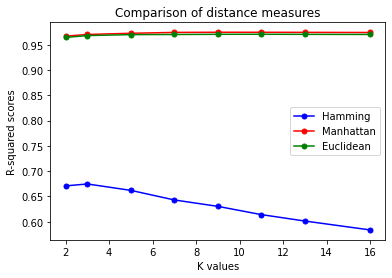


Simple Mean


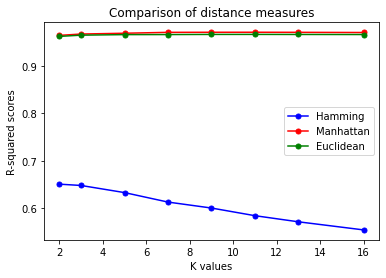

In [ ]:
# plot

print("Weighted Mean")
rsqs = []
for a,b in alldist_wm_score_dict.items():
    rs = []
    for p,q in b.items():
        rs.append(q['R-sqr'])
    rsqs.append(rs)

plt.plot(Ks_list, rsqs[0], label = "Hamming", color='blue', markersize=5, marker='o',markerfacecolor='blue')
plt.plot(Ks_list, rsqs[1], label = "Manhattan", color='red', markersize=5, marker='o',markerfacecolor='red')
plt.plot(Ks_list, rsqs[2], label = "Euclidean", color='green', markersize=5, marker='o',markerfacecolor='green')
plt.xlabel('K values')
plt.ylabel('R-squared scores')
plt.title('Comparison of distance measures')
plt.legend()
plt.show()

print("\nSimple Mean")
rsqs = []
for a,b in alldist_sm_score_dict.items():
    rs = []
    for p,q in b.items():
        rs.append(q['R-sqr'])
    rsqs.append(rs)

plt.plot(Ks_list, rsqs[0], label = "Hamming", color='blue', markersize=5, marker='o',markerfacecolor='blue')
plt.plot(Ks_list, rsqs[1], label = "Manhattan", color='red', markersize=5, marker='o',markerfacecolor='red')
plt.plot(Ks_list, rsqs[2], label = "Euclidean", color='green', markersize=5, marker='o',markerfacecolor='green')
plt.xlabel('K values')
plt.ylabel('R-squared scores')
plt.title('Comparison of distance measures')
plt.legend()
plt.show()

4. b) Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

Here, we observe that the R2 scores are not same but close to each other for the given Ks. The better way to choose the best K would be N-fold cross validation, where the dataset is equally divided into N partitions and the model with a particular K is validated on 1 of the N partitions and trained on the remaining until all partitions are once used for validation and the we take the average validation score. We repeat this process for each K and chose the K which gives best average accuracy.

Procedure:  
1) Shuffle the dataset randomly  
2) Split the dataset into N groups  
3) For each unique group:  
&nbsp;&nbsp;&nbsp;&nbsp;3a) Take the group as a hold out or test data set  
&nbsp;&nbsp;&nbsp;&nbsp;3b) Take the remaining groups as a training data set  
&nbsp;&nbsp;&nbsp;&nbsp;3c) Fit a model on the training set and evaluate it on the test set  
&nbsp;&nbsp;&nbsp;&nbsp;3d) Retain the evaluation score and discard the model  
4) Summarize the skill of the model using the sample of model evaluation scores  

This procedure is implemented below for KNN classification

5. a) Also, report the performance of scikit-learn’s kNN regression algorithm.  

In [ ]:
# scikit-learn KNN Regressor

## Standardized dataset gives best accuracy, so we use it further

'''For weighted mean'''
skl_alldist_wm_score_dict = {}

for algo in ['brute','kd_tree','ball_tree']:
    skl_alldist_wm_score_dict[algo] = {}
    for p in range(1,3):
        temp_dict = {}
        for k in Ks_list:
            neigh = KNeighborsRegressor(n_neighbors=k,weights='distance',algorithm=algo,p=p)
            neigh.fit(X_train_std, y_train)
            sknnpred = neigh.predict(X_test_std)
            temp_dict[k] = r2_score(y_test, sknnpred)
        skl_alldist_wm_score_dict[algo]['p'+str(p)] = temp_dict

print("******Weighted Mean******")
print("\nBrute force algorithm")
display(pd.DataFrame(skl_alldist_wm_score_dict['brute']).T)
print("\nKD-tree algorithm")
display(pd.DataFrame(skl_alldist_wm_score_dict['kd_tree']).T)
print("\nBall-tree algorithm")
display(pd.DataFrame(skl_alldist_wm_score_dict['ball_tree']).T)


'''For simple mean'''
skl_alldist_sm_score_dict = {}

for algo in ['brute','kd_tree','ball_tree']:
    skl_alldist_sm_score_dict[algo] = {}
    for p in range(1,3):
        temp_dict = {}
        for k in Ks_list:
            neigh = KNeighborsRegressor(n_neighbors=k,weights='uniform',algorithm=algo,p=p)
            neigh.fit(X_train_std, y_train)
            sknnpred = neigh.predict(X_test_std)
            temp_dict[k] = r2_score(y_test, sknnpred)
        skl_alldist_sm_score_dict[algo]['p'+str(p)] = temp_dict

print("\n\n******Simple Mean******")
print("\nBrute force algorithm")
display(pd.DataFrame(skl_alldist_sm_score_dict['brute']).T)
print("\nKD-tree algorithm")
display(pd.DataFrame(skl_alldist_sm_score_dict['kd_tree']).T)
print("\nBall-tree algorithm")
display(pd.DataFrame(skl_alldist_sm_score_dict['ball_tree']).T)


******Weighted Mean******

Brute force algorithm


,2,3,5,7,9,11,13,16
p1,0.966896,0.970197,0.972537,0.974259,0.974579,0.974534,0.974375,0.974116
p2,0.964382,0.967987,0.969888,0.970120,0.970520,0.970580,0.970417,0.970231



KD-tree algorithm


,2,3,5,7,9,11,13,16
p1,0.966893,0.970197,0.972544,0.974259,0.97458,0.974534,0.974375,0.974116
p2,0.964379,0.967992,0.969894,0.970121,0.97052,0.970585,0.970417,0.970230



Ball-tree algorithm


,2,3,5,7,9,11,13,16
p1,0.966892,0.970196,0.972544,0.974258,0.974580,0.974534,0.974375,0.974116
p2,0.964378,0.967990,0.969893,0.970122,0.970518,0.970584,0.970418,0.970230




******Simple Mean******

Brute force algorithm


,2,3,5,7,9,11,13,16
p1,0.965283,0.968129,0.969802,0.971710,0.971863,0.971912,0.971753,0.971374
p2,0.963112,0.965722,0.966881,0.967007,0.967307,0.967346,0.967217,0.967072



KD-tree algorithm


,2,3,5,7,9,11,13,16
p1,0.965280,0.968129,0.969815,0.971709,0.971864,0.971912,0.971753,0.971375
p2,0.963109,0.965727,0.966891,0.967008,0.967308,0.967352,0.967217,0.967072



Ball-tree algorithm


,2,3,5,7,9,11,13,16
p1,0.965279,0.968125,0.969815,0.971709,0.971864,0.971913,0.971753,0.971375
p2,0.963109,0.965725,0.966890,0.967009,0.967305,0.967352,0.967217,0.967072


5. b) Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]

In [ ]:
# Comparison

print("We consider k=11, as it performs well on our model and compare the R-squared scores below with SKlearn's brute force algorithm")

p_dist_map = {'p0':'Hamming','p1':'Manhattan','p2':'Euclidean'}

'''Weighted Mean'''
myskl_cmp_dist_wm_dict = {'Manhattan':{}, 'Euclidean':{}}

for a,b in alldist_wm_score_dict.items():
    if(a=='p0'):
        continue
    myskl_cmp_dist_wm_dict[p_dist_map[a]]['Our KNN'] = b[11]['R-sqr']

for a,b in skl_alldist_wm_score_dict.items():
    for p,q in b.items():
        myskl_cmp_dist_wm_dict[p_dist_map[p]]['SKlearn'] = q[11]
        myskl_cmp_dist_wm_dict[p_dist_map[p]]['Difference'] = np.float32(myskl_cmp_dist_wm_dict[p_dist_map[p]]['Our KNN'] - q[11])

print("\n****** Weighted Mean, K=11 *******")
display(pd.DataFrame(myskl_cmp_dist_wm_dict).T)


'''Simple Mean'''
myskl_cmp_dist_sm_dict = {'Manhattan':{}, 'Euclidean':{}}

for a,b in alldist_sm_score_dict.items():
    if(a=='p0'):
        continue
    myskl_cmp_dist_sm_dict[p_dist_map[a]]['Our KNN'] = b[11]['R-sqr']

for a,b in skl_alldist_sm_score_dict['brute'].items():
    myskl_cmp_dist_sm_dict[p_dist_map[a]]['SKlearn'] = b[11]
    myskl_cmp_dist_sm_dict[p_dist_map[a]]['Difference'] = np.float32(myskl_cmp_dist_sm_dict[p_dist_map[p]]['Our KNN'] - b[11])

print("\n****** Simple Mean, K=11 *******")
display(pd.DataFrame(myskl_cmp_dist_sm_dict).T)

We consider k=11, as it performs well on our model and compare the R-squared scores below with SKlearn's brute force algorithm

****** Weighted Mean, K=11 *******


,Our KNN,SKlearn,Difference
Manhattan,0.974534,0.974534,-2.161515e-07
Euclidean,0.970580,0.970584,-4.276119e-06



****** Simple Mean, K=11 *******


,Our KNN,SKlearn,Difference
Manhattan,0.971912,0.971912,-4.564956e-03
Euclidean,0.967347,0.967346,5.369756e-07


6. From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?

Advantages:  
1) There is no training required. It just stores the training instances to further calculate distances during test time  
2) New training data can be easily added  
3) KNN is a non-parametric model (eg. no learning rate, etc)  
4) It is intuitive, as it considers only nearest neighbours for predicting which is many times true in real world and this method is similar to as what humans predict things  
5) It is easy to understand and implement

Disadvantages:  
1) If the dataset is very large, calculating distances between the test point and every training point becomes expensive and time consuming  
2) If the right feature scaling method is not chosen the KNN would not be able to calculate distances correctly  
3) KNN is sensitive to noise and outliers as one wrong point can lead to wrong result if it is found to be closest to the test point  
4) N-fold cross validation becomes very expensive as we need to repeat the process several times


# **2)** **Linear Regression**

Dataset - same as above (Diamond Price Detection)


2a) Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 

Report and Calculate the error obtained.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
'''To read data from diamonds.csv'''
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('Regression_Diamonds_data/diamonds.csv', na_values=np.NaN,    
         header=None,  names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]
'''Convert categorical attributes to numeric'''
cat_to_num = {"cut":{"Fair":0, "Good":1, "Very Good":2, "Premium":3, "Ideal":4}, 
              "clarity":{"I1":0, "SI2":1, "SI1":2, "VS2":3, "VS1":4, "VVS2":5, "VVS1":6, "IF":7},
              "color":{"J":0, "I":1, "H":2, "G":3, "F":4, "E":5, "D":6}}
data = data.replace(cat_to_num)
print(data.head())
for h in headers:
    data[h] = pd.to_numeric(data[h],downcast='float')
X = data.drop('price', axis=1)
y = data.price

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X, y, test_size=0.20,random_state=1)
X_train_org = np.array(X_train_df)
X_test_org = np.array(X_test_df)
y_train = np.array(y_train_df)
y_test = np.array(y_test_df)

'''Standardize data'''
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_org)
X_test_std = scaler.transform(X_test_org)

  carat  cut  color  clarity depth table price     x     y     z
1  0.23    4      5        1  61.5    55   326  3.95  3.98  2.43
2  0.21    3      5        2  59.8    61   326  3.89  3.84  2.31
3  0.23    1      5        4  56.9    65   327  4.05  4.07  2.31
4  0.29    3      1        3  62.4    58   334   4.2  4.23  2.63
5  0.31    1      0        1  63.3    58   335  4.34  4.35  2.75


In [ ]:
class LinearRegressor():
    def __init__(self, lr, itrs):
        self.lr = lr
        self.itrs = itrs
        self.W = None

    def GD_fit(self, X, Y, test_x, test_y):
        X = np.c_[np.ones(X.shape[0]), X]
        test_x = np.c_[np.ones(test_x.shape[0]), test_x]
        n, f = np.shape(X)
        self.W = np.ones(f)
        mae_arr = []
        for i in range(self.itrs):
            errs = np.dot(X,self.W) - Y
            cost = np.sum(errs**2) / (2*n)
            gradient = np.dot(X.T, errs) / n
            self.W = self.W-self.lr*gradient
            if i % 5 == 0:
                pred_y = self.predict(test_x)
                mae = mean_absolute_error(pred_y,test_y)
                mae_arr.append([i,mae])
        return np.array(mae_arr)

    def predict(self, x, cat=False):
        if cat:
            x = np.c_[np.ones(x.shape[0]), x]
        return np.dot(x, self.W)

Here,  we first try out linear regression model on all features. The following graph shows the validation MAE during training. The following parameters are chosen after a number of experiments

Iterations: 1000  
Learing rate: 0.2


Linear Regression on entire dataset (all features)
R2 Score: 0.8976466582346719
MAE : 800.1821752094139
MSE : 1420345.69107116


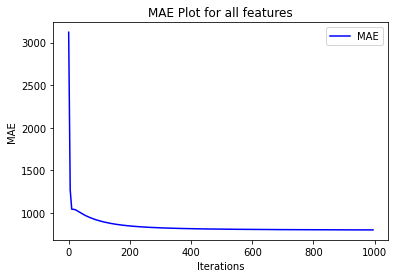

In [ ]:
itrs = 1000
lrgd = LinearRegressor(0.2,itrs=itrs)
mae_hist = lrgd.GD_fit(X_train_std, y_train, X_test_std, y_test)
lrg_pred_y = lrgd.predict(X_test_std,True)

print("Linear Regression on entire dataset (all features)")
print("R2 Score:",r2_score(lrg_pred_y,y_test))
print("MAE :",mean_absolute_error(lrg_pred_y,y_test))
print("MSE :",mean_squared_error(lrg_pred_y,y_test))


plt.plot(mae_hist[:,0], mae_hist[:,1], label = "MAE", color='blue')
plt.xlabel('Iterations')
plt.ylabel('MAE')
plt.title('MAE Plot for all features')
plt.legend()
plt.show()

2b) What are the best suitable features you used to predict the price of the dataset and Why?

Idea: Use Correlation to get the suitable features and Report the values accordingly.

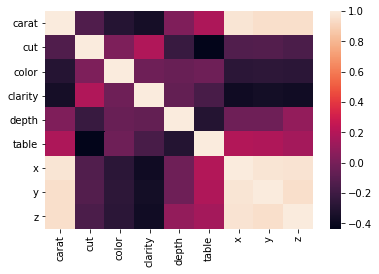

In [ ]:
#code for Correlation between features and the Diamond Price.
corr = X.corr()
sns.heatmap(corr)

Correlation is the measure of linear relationship between 2 quantitative variables which also tells us how strongly they are dependant on each other. If 2 features are highly correlated, they provide redundant information in regards to the target. Hence it is possible to make accurate prediction on the target with just one of the redundant features.

In [ ]:
cols = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if cols[j]:
                cols[j] = False
selected_cols = X.columns[cols]
redc_X = X[selected_cols]

print("Selected features are:")
display(redc_X.head())

Selected features are:


,carat,cut,color,clarity,depth,table
1,0.23,4.0,5.0,1.0,61.500000,55.0
2,0.21,3.0,5.0,2.0,59.799999,61.0
3,0.23,1.0,5.0,4.0,56.900002,65.0
4,0.29,3.0,1.0,3.0,62.400002,58.0
5,0.31,1.0,0.0,1.0,63.299999,58.0


In [ ]:
X_train_redc_df, X_test_redc_df, y_train_redc_df, y_test_redc_df = train_test_split(redc_X, y, test_size=0.20,random_state=1)
X_train_redc = np.array(X_train_redc_df)
X_test_redc = np.array(X_test_redc_df)
y_train_redc = np.array(y_train_redc_df)
y_test_redc = np.array(y_test_redc_df)

'''Standardize data'''
scaler = StandardScaler()
X_train_redc_std = scaler.fit_transform(X_train_redc)
X_test_redc_std = scaler.transform(X_test_redc)

We observe that the same model trained on same parameters but with reduced features gives us the same score

Linear Regression on only selected features
R2 Score: 0.8939199059776919
MAE : 847.7514068612998
MSE : 1473505.307637412


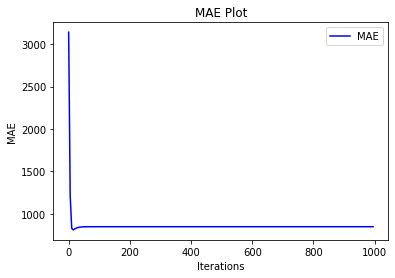

In [ ]:
itrs = 1000
lrgd = LinearRegressor(0.2,itrs=itrs)
mae_histr = lrgd.GD_fit(X_train_redc_std, y_train_redc, X_test_redc_std, y_test_redc)
lrg_predc_y = lrgd.predict(X_test_redc_std,True)

print("Linear Regression on only selected features")
print("R2 Score:",r2_score(lrg_predc_y,y_test_redc))
print("MAE :",mean_absolute_error(lrg_predc_y,y_test_redc))
print("MSE :",mean_squared_error(lrg_predc_y,y_test_redc))



plt.plot(mae_histr[:,0], mae_histr[:,1], label = "MAE", color='blue')
plt.xlabel('Iterations')
plt.ylabel('MAE')
plt.title('MAE Plot')
plt.legend()
plt.show()

Explanation for 2b) - 

2c) Use the module Linear Regression from sklearn to predict the price of diamonds(considering the same attributes as before) and compare the result obtained with the above. 


In [ ]:
# import sklearn model
skreg = LinearRegression().fit(X_train_redc_std, y_train_redc)
print("Sklearn linear regression score for selected features:",skreg.score(X_test_redc_std, y_test_redc))
print("Our linear regression score for selected features:",r2_score(lrg_predc_y,y_test_redc))

Sklearn linear regression score for selected features: 0.9051707575469035
Our linear regression score for selected features: 0.8939199059776919


2d) Now, using the whole dataset, predict the price of the Diamonds using the module of Linear Regression from sklearn. Report the changes you have observed compared to before? Adding extra features did it make the prediction better or worse.Comment? 


In [ ]:
skreg = LinearRegression().fit(X_train_std, y_train)
print("Sklearn linear regression score for all features:",skreg.score(X_test_std, y_test))
print("Our linear regression score for all features:",r2_score(lrg_pred_y,y_test))

Sklearn linear regression score for all features: 0.9086830124889127
Our linear regression score for all features: 0.8976466582346719


2e) Now, compare the algorithms KNN regression and Linear Regression. What are the differences you have observed? Which is better and why. Your statements should be backed up with statistics. 


Explanation - 

Differences:  
For the given dataset, KNN regression performs better as linear regression supports linear solutions whereas KNN can support non-linear solutions as well. KNN algorithm is much slower than linear regression. We need to try out different values for learning rate and iterations for linear regression. Prediction in case of linear regression is very easy and fast. Also the weights of the linear regression model give us the idea avout how much importnat a particular feature is.

Which is better:  
For smaller dimensions and sufficient data, KNN may give better results as it it tries to approximate based on some local vicinity and can also model non-linearity. But as the dimensions increase, KNN will start to suffer from curse of dimension. Eg. if in the current dimension, there is no training instance, the test point will be estimated based on long distant instances of other dimensions and also would become very expensive to calculate distances. Whereas, in most of the cases, linear regression model will not suffer from curse of dimensionality as its weights will not increase exponentially wrt number of features. 

2f) Plot the predicted values from KNN regression, Linear Regression and Actual Diamond Price.


Actual price vs predicted price plot



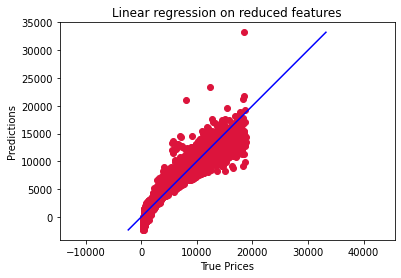

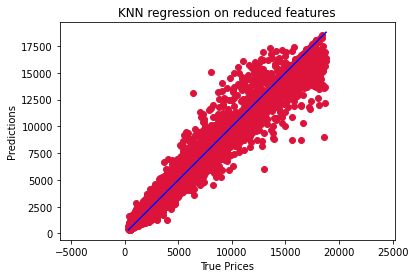

In [ ]:
#plot 
'''Minkowski distance function'''
def minkowski_dist(test_pt, train_X, p):
    temp = abs(test_pt - train_X) 
    if p==2:
        return np.sqrt(np.sum(temp*temp,axis=1))
    if p==1:
        return np.sum(temp,axis=1)
    if p==0:
        temp = temp!=0
        return np.sum(temp*1,axis=1)

max_nn = 25

def cal_all_dists(train_X,test_X,p):
    all_dists = [] 
    for i in range(test_X.shape[0]):
        cur_dists = minkowski_dist(test_X[i],train_X,p)
        idx = np.argpartition(cur_dists, max_nn)[:max_nn]
        cur_dists = cur_dists[idx]
        df_cur_dists = pd.DataFrame(data=cur_dists, columns=['dist'], index=idx)
        df_cur_dists = df_cur_dists.sort_values(by=['dist'], axis=0)
        all_dists.append(df_cur_dists)
    return all_dists

def knn_predict(test_X,train_y,all_dists,k,metric=1):
    predictions = []
    for c in range(test_X.shape[0]):
        knn_dists = all_dists[c][:k]
        knn_ys = np.array([train_y[j] for j in knn_dists.index])
        knn_dists = np.array(knn_dists).reshape((k,))
        if metric==0:
            predictions.append(knn_ys.mean())
        else:
            if 0 in knn_dists:
                knn_ws = np.array(knn_dists==0, dtype=float)
            else:
                knn_ws = 1/knn_dists
            predictions.append(np.sum(knn_ys * knn_ws)/np.sum(knn_ws))
        c+=1
    return predictions

all_dists_std = cal_all_dists(X_train_redc_std,X_test_redc_std,1)
y_pred_knn = knn_predict(X_test_redc_std,y_train_redc,all_dists_std,11)

print("Actual price vs predicted price plot\n")

plt.scatter(y_test_redc, lrg_predc_y, c='crimson')
p1 = max(max(lrg_predc_y), max(y_test_redc))
p2 = min(min(lrg_predc_y), min(y_test_redc))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Prices')
plt.ylabel('Predictions')
plt.axis('equal')
plt.title("Linear regression on reduced features")
plt.show()


plt.scatter(y_test_redc, y_pred_knn, c='crimson')
p1 = max(max(y_pred_knn), max(y_test_redc))
p2 = min(min(y_pred_knn), min(y_test_redc))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Prices')
plt.ylabel('Predictions')
plt.axis('equal')
plt.title("KNN regression on reduced features")
plt.show()

#**KNN Classifier**

In this problem you are required to train, test and validate a K-Nearest Neighbor Classifier on the famous CIFAR-10 dataset. The next few cells will guide you through the process. Follow along...

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
from __future__ import print_function
from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform
from scipy import stats 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [ ]:
# Run some setup code for this notebook.

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Download the dataset
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

--2021-01-25 17:02:02--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  71.2MB/s    in 2.3s    

2021-01-25 17:02:04 (71.2 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))
  
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

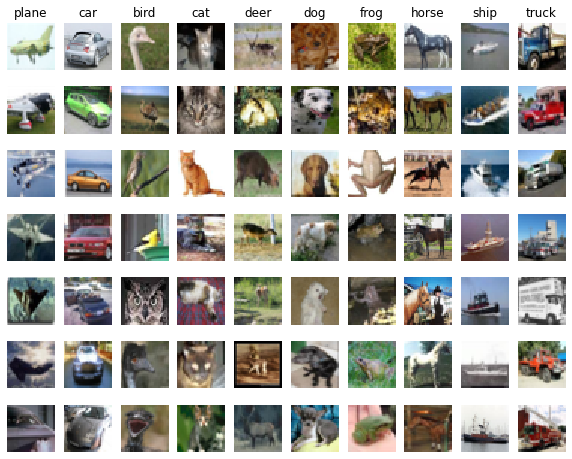

In [ ]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [ ]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In the next cell you are going to implement the main KNearestNeighbor class and keep adding functions to it as and when required in the subsequent steps.

In [ ]:
# You will keep coming back to this cell to add more functions as and when
# required. Right now it is very simple!
class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """
    def __init__(self):
        self.train_X = []
        self.train_y = []
    
    def train(self, train_X, train_y):
        self.train_X = train_X
        self.train_y = train_y
    
    def compute_distances_two_loops(self, test_X):
        all_dists = []
        for i in range(test_X.shape[0]):
            cur_dist = []
            for j in range(self.train_X.shape[0]):
                temp = abs(self.train_X[j] - test_X[i])
                cur_dist.append(np.sqrt(np.dot(temp,temp)))
            all_dists.append(cur_dist)
        return np.array(all_dists)

    def compute_distances_single_loop(self, test_X):
        all_dists = []
        for i in range(test_X.shape[0]):
            temp = self.train_X - test_X[i]
            all_dists.append(np.sqrt(np.sum(temp*temp,axis=1)))
        return np.array(all_dists)

    def compute_distances_no_loop(self, test_X):
        all_dists = -2 * np.dot(test_X, self.train_X.T) + np.sum(self.train_X**2, axis=1) + np.sum(test_X**2, axis=1)[:, np.newaxis]
        all_dists = np.sqrt(all_dists)
        return all_dists

    def predict_labels(self,all_dists,k=1):
        max_nn = 15
        pred_y = []
        for cur_dists in all_dists:
            idx = np.argpartition(cur_dists, max_nn)[:max_nn]
            cur_dists = cur_dists[idx]
            df_cur_dists = pd.DataFrame(data=cur_dists, columns=['dist'], index=idx)
            knn_cur_dists = df_cur_dists.sort_values(by=['dist'], axis=0)[:k]
            knn_ys = [self.train_y[j] for j in knn_cur_dists.index]
            freq_y = [knn_ys.count(e) for e in knn_ys]
            pry = knn_ys[np.argmax(freq_y)]
            pred_y.append(pry)
        return pred_y

Go back to KNearestNeighbor class and add a method to train the classifier. Your function will be called as below. In KNN classifier, this step is a simple memorization of the training data.

In [ ]:
# Make sure to add train() in the classifier class before executing this cell
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

Go back to KNearestNeighbor class and add a method to compute distances between each pair of test image and train image. You can use two loops to do this. Remember we are using standard L-2 distance metric. Precisely your method should return a distance matrix($D$) where $D(i,j)$ = **L-2** distance between the $i^{th}$ test image and the $j^{th}$ train image. Your function will be called as below

In [ ]:
# Make sure to add compute_distances_two_loops() in the classifier class 
# before executing this cell
dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)

(500, 5000)


Next implement the function to predict labels. Again go back to the KNearestNeighbor class cell. Your function will be called as below

In [ ]:
# Make sure to add predict_labels() in the classifier class 
# before executing this cell
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 correct => accuracy: 0.274000


Now we have a basic classifier ready but it is extremely inefficient. In Machine Learning writing vectorised code is one of the most important skills. 

Now you have to again go back to the KNearestNeighbor class cell and add functions to compute the distance matrix using:
1.   single loop
2.   no loops

From here onwards we won't do as much hand holding as done before. You are expected to write all the code from scratch



In [ ]:
# Use this cell to present your timing results for computing distance matrix
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

times = {}

start = time.time()
dists2 = classifier.compute_distances_two_loops(X_test)
end = time.time()
times['Two-loops'] = (end - start)

start = time.time()
dists1 = classifier.compute_distances_single_loop(X_test)
end = time.time()
times['Single-loop'] = (end - start)

start = time.time()
dists0 = classifier.compute_distances_no_loop(X_test)
end = time.time()
times['No-loop'] = (end - start)

print("Checking if distances computed are same")
print(dists0.shape,dists1.shape,dists2.shape)
print(np.sum(dists0!=dists1))
print(np.sum(dists1!=dists2))
print(np.sum(dists0!=dists2))
display(pd.DataFrame(times,index=[0]))


Checking if distances computed are same
(500, 5000) (500, 5000) (500, 5000)
0
0
0


,Two-loops,Single-loop,No-loop
0,35.346255,22.26556,0.560938


Next, you are required to tabulate the time taken to compute the distance matrix using each of the three above methods implemented for k = 1, 3, 5, 7.

In [ ]:
# Use this cell to compute accuracies for k = 3, 5, 7

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

allk_acc = {'Our KNN':{},'SKlearn':{},'Difference':{}}
num_test = len(y_test)

# K = 1.....9

for k in range(1,10):
    y_preds = classifier.predict_labels(dists0, k=k)
    num_correct = np.sum(y_preds == y_test)
    allk_acc['Our KNN'][k] = float(num_correct) / num_test

for k in range(1,10):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_preds = neigh.predict(X_test)
    num_correct = np.sum(y_preds == y_test)
    allk_acc['SKlearn'][k] = float(num_correct) / num_test
    allk_acc['Difference'][k] = allk_acc['Our KNN'][k] - allk_acc['SKlearn'][k]

display(pd.DataFrame(allk_acc))


,Our KNN,SKlearn,Difference
1,0.274,0.274,0.000
2,0.274,0.224,0.050
3,0.280,0.272,0.008
4,0.284,0.272,0.012
5,0.290,0.278,0.012
6,0.290,0.282,0.008
7,0.292,0.274,0.018
8,0.294,0.274,0.020
9,0.290,0.268,0.022


As you can see that in KNN algorithm it is important to tune the hyperparameter K. We will do this using Cross Validation Leave One Out approach. The idea is to split the train set into few folds(here we recommend you to set the fold number to 5). Then, for each value of K, we leave one of these folds out to evaluate performance but use the others to train. Repeat this by leaving each fold out once. You will get 5 accuracies in this case, one for leaving out each fold. Depending on the average accuracy decide on the optimal value of K. Report the same. We also expect you to present plots showing the average accuracy and standard deviation for each value of K.

In [ ]:
# Use this cell to implement Cross Validation

ks_list = [1,3,5,7,9]

kfolder = KFold(n_splits=5,random_state=1, shuffle=True)

kfold_acc = {}

for k in ks_list:
    kfold_acc[k] = {}
    sum_facc = 0 
    for i, kfd in enumerate(kfolder.split(X_train)):
        fx_train, fx_test = X_train[kfd[0]], X_train[kfd[1]]
        fy_train, fy_test = y_train[kfd[0]], y_train[kfd[1]]
        myknn = KNearestNeighbor()
        myknn.train(fx_train, fy_train)
        f_dists = myknn.compute_distances_no_loop(fx_test)
        fy_preds = myknn.predict_labels(f_dists, k=k)
        # neigh = KNeighborsClassifier(n_neighbors=k)
        # neigh.fit(fx_train, fy_train)
        # fy_preds = neigh.predict(fx_test)
        num_correct = np.sum(fy_preds == fy_test)
        facc = float(num_correct) / len(fy_test)
        kfold_acc[k]['Fold-'+str(i)] = facc
        sum_facc += facc
    kfold_acc[k]['Avg'] = sum_facc / 5

display(pd.DataFrame(kfold_acc).T)

,Fold-0,Fold-1,Fold-2,Fold-3,Fold-4,Avg
1,0.283,0.258,0.249,0.273,0.276,0.2678
3,0.282,0.284,0.255,0.276,0.266,0.2726
5,0.291,0.277,0.280,0.288,0.285,0.2842
7,0.292,0.272,0.293,0.289,0.298,0.2888
9,0.285,0.265,0.288,0.282,0.287,0.2814


In this last part of the notebook you are expected to do the following and present appropriate reports/results:

1. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels in all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
2. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels at that position from all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
3. What is the time complexity of training using KNN classifier? What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?
4. Bonus: Explore what image features you can use to better the performance of KNN classifier.




We observe that there is no such change in the accuracies after applying the given preprocessing techniques. This is because we have subtracted the overall mean (constant) from each pixel, which does not change the relative distances. First method performs slightly better than the 2nd one as in the 1st method all distances (within columns as well as within rows) are perfectly maintained. 

In [ ]:
mean_sub_acc = {'Mean(all pixels)':{}, 'Mean(positional pixels)':{}}

Xtrain_all_mean = X_train - X_train.mean()
Xtest_all_mean = X_test - X_test.mean()

# print(Xtrain_all_mean[0,:10])
print(np.sum(Xtrain_all_mean))

classifier = KNearestNeighbor()
classifier.train(Xtrain_all_mean, y_train)
msa_dists = classifier.compute_distances_no_loop(Xtest_all_mean)

num_test = len(y_test)

temp_ms_acc = {}
sum_acc = 0
for k in ks_list:
    y_preds = classifier.predict_labels(msa_dists, k=k)
    num_correct = np.sum(y_preds == y_test)
    acc = float(num_correct) / num_test
    temp_ms_acc[k] = acc
    sum_acc += acc
temp_ms_acc['Avg'] = sum_acc/len(ks_list)
mean_sub_acc['Mean(all pixels)'] = temp_ms_acc


Xtrain_pos_mean = X_train - np.mean(X_train,axis=0)
Xtest_pos_mean = X_test - np.mean(X_test,axis=0)

classifier = KNearestNeighbor()
classifier.train(Xtrain_pos_mean, y_train)
msp_dists = classifier.compute_distances_no_loop(Xtest_pos_mean)

# print(Xtrain_pos_mean[0,:10])
print(np.sum(Xtrain_pos_mean,axis=0))

temp_ms_acc = {}
sum_acc = 0
for k in ks_list:
    y_preds = classifier.predict_labels(msp_dists, k=k)
    num_correct = np.sum(y_preds == y_test)
    acc = float(num_correct) / num_test
    temp_ms_acc[k] = acc
    sum_acc += acc
temp_ms_acc['Avg'] = sum_acc/len(ks_list)
mean_sub_acc['Mean(positional pixels)'] = temp_ms_acc

display(pd.DataFrame(mean_sub_acc))

1.6039120964705944e-07
[-3.31681349e-11 -9.68043423e-11  1.06467724e-10 ... -1.01408659e-10
  1.00669695e-10 -2.05147899e-10]


,Mean(all pixels),Mean(positional pixels)
1,0.2660,0.2700
3,0.2920,0.2660
5,0.2920,0.2880
7,0.2820,0.2700
9,0.2800,0.2900
Avg,0.2824,0.2768


Here, we have followed the brute force approach for KNN. Consider that distance computation between 2 points takes O(d) time which increases with the increase in the dimensions. We calculate distances for the testing point with all the 'n' training points. So distance calculation takes O(dn). We have calculated distances only once. Then we find the smallest 'k' distances from the 'n' distances which takes time O(kn). Thus our overall time complexity for KNN is : O(dn + kn).

# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```


In [88]:
import seaborn as sns
import pandas as pd
import random
import time
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

We observe that there are no non-numeric values in the dataset

In [11]:

headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
display(data.describe())
display(data.info())

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CT         699 non-null    int64  
 1   UCSize     699 non-null    int64  
 2   UCShape    699 non-null    int64  
 3   MA         699 non-null    int64  
 4   SECSize    699 non-null    int64  
 5   BN         699 non-null    float64
 6   BC         699 non-null    int64  
 7   NN         699 non-null    int64  
 8   Mitoses    699 non-null    int64  
 9   Diagnosis  699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


None

1. a) Implement a decision tree(from scratch using only python data structures) as a class.

In [2]:
def splitTrainTest(data_df, test_size):
    random.seed(4)
    if isinstance(test_size, float):
        test_size = round(test_size * len(data_df))
    indices = data_df.index.tolist()
    test_indices = random.sample(population = indices, k=test_size)
    test_data_df = data_df.loc[test_indices]
    train_data_df = data_df.drop(test_indices)
    return train_data_df, test_data_df

def calculateAccuracy(predictions, category):
    result_correct = predictions == category
    return result_correct.mean()

In [40]:

class MyDecisionTree(object):
    def __init__(self, data_df, split_metric, max_depth=10, min_samples=2):
        self.org_data_df = data_df.values
        self.split_metric = split_metric
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.col_headers = data_df.columns
        self.classmap = {2:'Benign', 4:'Malignant'}
        self.decision_tree = self.buildDecisionTree(self.org_data_df, 0)

    def checkPurity(self, curr_data_df):
        if len(np.unique(curr_data_df[:, -1])) > 1:
            return False
        else:
            return True
    
    def classifyData(self, curr_data_df):
        uniq_classes, uniq_classes_counts = np.unique(curr_data_df[:, -1], return_counts=True)
        return uniq_classes[uniq_classes_counts.argmax()]

    def getPotentialSplits(self, curr_data_df):
        potential_splits = {}
        num_cols = curr_data_df.shape[1]
        cols_indices = list(range(num_cols - 1))
        for col_idx in cols_indices:
            values = curr_data_df[:, col_idx]
            unique_values = np.unique(values)
            if len(unique_values) == 1:
                potential_splits[col_idx] = unique_values
            else:
                potential_splits[col_idx] = []
                for i in range(1,len(unique_values)):
                    curr_val = unique_values[i]
                    prev_val = unique_values[i - 1]
                    potential_splits[col_idx].append((curr_val + prev_val) / 2)
        return potential_splits

    def calculateEntropy(self, curr_data_df):
        _, uniq_classes_counts = np.unique(curr_data_df[:, -1], return_counts = True)
        probabilities = uniq_classes_counts / uniq_classes_counts.sum()
        return sum(probabilities * -np.log2(probabilities))

    def calcOverallEntropy(self, data_below, data_above):
        p_data_below = len(data_below) / (len(data_below) + len(data_above))
        p_data_above = len(data_above) / (len(data_below) + len(data_above))
        return p_data_below * self.calculateEntropy(data_below) + p_data_above * self.calculateEntropy(data_above)

    def getBestSplit_Entropy(self, curr_data_df, potential_splits):
        overall_entropy = 9999
        best_split_col = 0
        best_split_val = 0
        for split_col in potential_splits:
            for split_val in potential_splits[split_col]:
                data_below, data_above = self.splitData(curr_data_df, split_col, split_val)
                curr_overall_entropy = self.calcOverallEntropy(data_below, data_above)
                if curr_overall_entropy <= overall_entropy:
                    overall_entropy = curr_overall_entropy
                    best_split_col = split_col
                    best_split_val = split_val
        return best_split_col, best_split_val

    def calcGiniImpurity(self, curr_data_df):
        uniq_classes, uniq_classes_counts = np.unique(curr_data_df[:, -1], return_counts = True)
        impurity = 1.0
        for i in range(len(uniq_classes_counts)):
            p_i = uniq_classes_counts[i] / sum(uniq_classes_counts)
            impurity -= p_i ** 2 
        return impurity

    def calcInfoGain(self, data_below, data_above, impurity):
        p_data_below = len(data_below) / (len(data_below) + len(data_above))
        p_data_above = len(data_above) / (len(data_below) + len(data_above))
        return impurity - p_data_below * self.calcGiniImpurity(data_below) - p_data_above * self.calcGiniImpurity(data_above)

    def getBestSplit_Gini(self, curr_data_df, potential_splits):
        best_infogain = 0
        best_split_col = 0
        best_split_val = 0
        node_impurity = self.calcGiniImpurity(curr_data_df)
        for split_col in potential_splits:
            for split_val in potential_splits[split_col]:
                data_below, data_above = self.splitData(curr_data_df, split_col, split_val)
                curr_infogain = self.calcInfoGain(data_below, data_above, node_impurity)
                if curr_infogain >= best_infogain:
                    best_infogain = curr_infogain
                    best_split_col = split_col
                    best_split_val = split_val
        return best_split_col, best_split_val

    def calcMisclassRate(self, curr_data_df):
        _, uniq_classes_counts = np.unique(curr_data_df[:, -1], return_counts = True)
        probabilities = uniq_classes_counts / uniq_classes_counts.sum()
        if len(probabilities)==0:
            return 0
        return 1 - max(probabilities)

    def calcOverallMisclassRate(self, data_below, data_above):
        p_data_below = len(data_below) / (len(data_below) + len(data_above))
        p_data_above = len(data_above) / (len(data_below) + len(data_above))
        return p_data_below * self.calcMisclassRate(data_below) + p_data_above * self.calcMisclassRate(data_above)

    def getBestSplit_MisclassRate(self, curr_data_df, potential_splits):
        overall_misclass_rate = 9999
        best_split_col = 0
        best_split_val = 0
        for split_col in potential_splits:
            for split_val in potential_splits[split_col]:
                data_below, data_above = self.splitData(curr_data_df, split_col, split_val)
                curr_overall_misclass_rate = self.calcOverallMisclassRate(data_below, data_above)
                if curr_overall_misclass_rate <= overall_misclass_rate:
                    overall_misclass_rate = curr_overall_misclass_rate
                    best_split_col = split_col
                    best_split_val = split_val
        return best_split_col, best_split_val

    def getBestSplit(self, curr_data_df, potential_splits):
        if self.split_metric == 'entropy':
            return self.getBestSplit_Entropy(curr_data_df, potential_splits)
        if self.split_metric == 'gini':
            return self.getBestSplit_Gini(curr_data_df, potential_splits)
        if self.split_metric == 'misclass_rate':
            return self.getBestSplit_MisclassRate(curr_data_df, potential_splits)

    def splitData(self, curr_data_df, split_col, split_val):
        split_col_vals = curr_data_df[:, split_col]
        return curr_data_df[split_col_vals <= split_val], curr_data_df[split_col_vals > split_val]

    def buildDecisionTree(self, curr_data_df, curr_depth):
        if self.checkPurity(curr_data_df) or len(curr_data_df)<self.min_samples or curr_depth==self.max_depth:
            return self.classifyData(curr_data_df)
        else:
            curr_depth += 1
            potential_splits = self.getPotentialSplits(curr_data_df)
            split_col, split_val = self.getBestSplit(curr_data_df, potential_splits)
            data_below, data_above = self.splitData(curr_data_df, split_col, split_val)
            if len(data_below)==0 or len(data_above)==0:
                return self.classifyData(curr_data_df)
            else:
                question = str(self.col_headers[split_col])+" <= "+str(split_val)
                decision_subtree = {question: []}
                yes_answer = self.buildDecisionTree(data_below, curr_depth)
                no_answer = self.buildDecisionTree(data_above, curr_depth)
                if yes_answer == no_answer:
                    decision_subtree = yes_answer
                else:
                    decision_subtree[question].append(yes_answer)
                    decision_subtree[question].append(no_answer)
                return decision_subtree

    def classifySample(self, sample, curr_subtree):
        if not isinstance(curr_subtree, dict):
            return curr_subtree
        question = list(curr_subtree.keys())[0]
        attribute, value = question.split(" <= ")
        if sample[attribute] <= float(value):
            answer = curr_subtree[question][0]
        else:
            answer = curr_subtree[question][1]
        return self.classifySample(sample, answer)

    def decisionTreePredictions(self, test_data_df):
        predictions = test_data_df.apply(self.classifySample, axis=1, args = (self.decision_tree,))
        return predictions

    def showDecisionTree(self):
        self.print_dtree(self.decision_tree, depth=0, indent=2)
        # return self.decision_tree

    def print_dtree(self, tree_dict, depth=0, indent=2):
        if not isinstance(tree_dict, dict):
            print("{}{}".format(" "*(indent*depth), self.classmap[int(tree_dict)]))
        else:
            q = list(tree_dict.keys())[0]
            print("{}{}".format(" "*(indent*depth), 'Is '+q+'?'))
            print("{}{}".format(" "*(indent*depth), 'True Branch'))
            self.print_dtree(tree_dict[q][0], depth+1, indent)
            print("{}{}".format(" "*(indent*depth), 'Is'+q+'?'))
            print("{}{}".format(" "*(indent*depth), 'False Branch'))
            self.print_dtree(tree_dict[q][1], depth+1, indent)


In [108]:
df_train, df_test = splitTrainTest(data, test_size=0.20)
# display(df_train.head())

1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

In [72]:
metrics = ['entropy', 'gini', 'misclass_rate']
test_acc = {}

print("Initialized the trees with Min-samples:",4)

for metric in metrics:
    print("\n***** Metric:",metric,'*****')
    i = 1
    acc_train = 0
    train_acc_rep = 0
    prev_acc_train = 0
    max_testacc = 0
    best_depth = 0
    while acc_train<100 and train_acc_rep<2:
        dt_classfier = MyDecisionTree(df_train, split_metric=metric, max_depth=i, min_samples=4)
        dt_preds_train = dt_classfier.decisionTreePredictions(df_train)
        acc_train = calculateAccuracy(dt_preds_train, df_train.iloc[:, -1]) * 100
        dt_preds_test = dt_classfier.decisionTreePredictions(df_test)
        acc_test = calculateAccuracy(dt_preds_test, df_test.iloc[:, -1]) * 100
        print("maxDepth = {}: ".format(i), end = " ")
        print("Train acc = {0:.2f}%, ".format(acc_train), end = " ")
        print("Test acc = {0:.2f}%, ".format(acc_test), end = " ")
        print("Test Rsqr = {0:.2f} ".format(r2_score(dt_preds_test,df_test.iloc[:, -1])), end = "\n")
        if acc_test >= max_testacc:
            max_testacc = acc_test
            best_depth = i
        if prev_acc_train==acc_train:
            train_acc_rep += 1
        else:
            train_acc_rep = 0
        prev_acc_train = acc_train
        i += 1
    test_acc[metric] = best_depth

Initialized the trees with Min-samples: 4

***** Metric: entropy *****
maxDepth = 1:  Train acc = 92.67%,  Test acc = 91.43%,  Test Rsqr = 0.64 
maxDepth = 2:  Train acc = 92.67%,  Test acc = 91.43%,  Test Rsqr = 0.64 
maxDepth = 3:  Train acc = 97.14%,  Test acc = 91.43%,  Test Rsqr = 0.62 
maxDepth = 4:  Train acc = 98.03%,  Test acc = 92.86%,  Test Rsqr = 0.69 
maxDepth = 5:  Train acc = 98.57%,  Test acc = 91.43%,  Test Rsqr = 0.63 
maxDepth = 6:  Train acc = 98.93%,  Test acc = 90.71%,  Test Rsqr = 0.61 
maxDepth = 7:  Train acc = 99.82%,  Test acc = 91.43%,  Test Rsqr = 0.64 
maxDepth = 8:  Train acc = 99.82%,  Test acc = 91.43%,  Test Rsqr = 0.64 
maxDepth = 9:  Train acc = 99.82%,  Test acc = 91.43%,  Test Rsqr = 0.64 

***** Metric: gini *****
maxDepth = 1:  Train acc = 92.67%,  Test acc = 91.43%,  Test Rsqr = 0.64 
maxDepth = 2:  Train acc = 95.71%,  Test acc = 92.14%,  Test Rsqr = 0.67 
maxDepth = 3:  Train acc = 96.42%,  Test acc = 92.86%,  Test Rsqr = 0.70 
maxDepth = 4:  

Training and testing accuracy is noted for different tree max-depth values. We see that as the max_depth increases, the training accuracy also increases but then the tree starts to overfit gradually so the testing accuracy starts decreasing with large max-depth. The best tree here is the one with large train (not ~100%) and large test accuracy and acceptable max-depth

1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

In [70]:
print("Best test accuracy for Min-samples=4")
# print(test_acc)

for metric,depth in test_acc.items():
    print("\n\n****** Metric:",metric,"*******")
    dt_classfier = MyDecisionTree(df_train, split_metric=metric, max_depth=depth, min_samples=4)
    dt_preds_train = dt_classfier.decisionTreePredictions(df_train)
    acc_train = calculateAccuracy(dt_preds_train, df_train.iloc[:, -1]) * 100
    dt_preds_test = dt_classfier.decisionTreePredictions(df_test)
    acc_test = calculateAccuracy(dt_preds_test, df_test.iloc[:, -1]) * 100
    print("maxDepth = {}: ".format(i), end = " ")
    print("Train acc = {0:.2f}%, ".format(acc_train), end = " ")
    print("Test acc = {0:.2f}%, ".format(acc_test), end = " ")
    print("Test MAE = {0:.2f}, ".format(mean_absolute_error(dt_preds_test,df_test.iloc[:, -1])), end = " ")
    print("Test MSE = {0:.2f}, ".format(mean_squared_error(dt_preds_test,df_test.iloc[:, -1])), end = " ")
    print("Test Rsqr = {0:.2f} ".format(r2_score(dt_preds_test,df_test.iloc[:, -1])), end = " ")

Best test accuracy for Min-samples=4


****** Metric: entropy *******
maxDepth = 12:  Train acc = 98.03%,  Test acc = 92.86%,  Test MAE = 0.14,  Test MSE = 0.29,  Test Rsqr = 0.69  

****** Metric: gini *******
maxDepth = 12:  Train acc = 97.32%,  Test acc = 92.86%,  Test MAE = 0.14,  Test MSE = 0.29,  Test Rsqr = 0.69  

****** Metric: misclass_rate *******
maxDepth = 12:  Train acc = 98.93%,  Test acc = 95.00%,  Test MAE = 0.10,  Test MSE = 0.20,  Test Rsqr = 0.78  

1. d) Experiment with different approaches to decide when to terminate the tree(number of layers, purity measure, etc). Report and give explanations for all approaches. 

In [73]:
print("Split metric: Entropy\n")
for max_depth in range(1,df_train.shape[1]):
    print("******** Max Depth = {}: *********".format(max_depth), end = "\n")
    for min_samples in [2,10,25,50,75,100]:
        start_time = time.time()
        dt_classfier = MyDecisionTree(df_train, split_metric='entropy', max_depth=max_depth, min_samples=min_samples)
        build_time = time.time() - start_time
        dt_preds_train = dt_classfier.decisionTreePredictions(df_train)
        acc_train = calculateAccuracy(dt_preds_train, df_train.iloc[:, -1]) * 100
        dt_preds_test = dt_classfier.decisionTreePredictions(df_test)
        acc_test = calculateAccuracy(dt_preds_test, df_test.iloc[:, -1]) * 100
        print("Min samples = {}: ".format(min_samples), end = " ")
        print("Train acc = {0:.2f}%, ".format(acc_train), end = " ")
        print("Test acc = {0:.2f}%, ".format(acc_test), end = " ")
        print("Test Rsqr = {0:.2f} ".format(r2_score(dt_preds_test,df_test.iloc[:, -1])), end = "\n")

Split metric: Entropy

******** Max Depth = 1: *********
Min samples = 2:  Train acc = 92.67%,  Test acc = 91.43%,  Test Rsqr = 0.64 
Min samples = 10:  Train acc = 92.67%,  Test acc = 91.43%,  Test Rsqr = 0.64 
Min samples = 25:  Train acc = 92.67%,  Test acc = 91.43%,  Test Rsqr = 0.64 
Min samples = 50:  Train acc = 92.67%,  Test acc = 91.43%,  Test Rsqr = 0.64 
Min samples = 75:  Train acc = 92.67%,  Test acc = 91.43%,  Test Rsqr = 0.64 
Min samples = 100:  Train acc = 92.67%,  Test acc = 91.43%,  Test Rsqr = 0.64 
******** Max Depth = 2: *********
Min samples = 2:  Train acc = 92.67%,  Test acc = 91.43%,  Test Rsqr = 0.64 
Min samples = 10:  Train acc = 92.67%,  Test acc = 91.43%,  Test Rsqr = 0.64 
Min samples = 25:  Train acc = 92.67%,  Test acc = 91.43%,  Test Rsqr = 0.64 
Min samples = 50:  Train acc = 92.67%,  Test acc = 91.43%,  Test Rsqr = 0.64 
Min samples = 75:  Train acc = 92.67%,  Test acc = 91.43%,  Test Rsqr = 0.64 
Min samples = 100:  Train acc = 92.67%,  Test acc = 

In [74]:
print("Split metric: Gini\n")
for max_depth in range(1,df_train.shape[1]):
    print("******** Max Depth = {}: *********".format(max_depth), end = "\n")
    for min_samples in [2,10,25,50,75,100]:
        start_time = time.time()
        dt_classfier = MyDecisionTree(df_train, split_metric='gini', max_depth=max_depth, min_samples=min_samples)
        build_time = time.time() - start_time
        dt_preds_train = dt_classfier.decisionTreePredictions(df_train)
        acc_train = calculateAccuracy(dt_preds_train, df_train.iloc[:, -1]) * 100
        dt_preds_test = dt_classfier.decisionTreePredictions(df_test)
        acc_test = calculateAccuracy(dt_preds_test, df_test.iloc[:, -1]) * 100
        print("Min Samples = {}: ".format(min_samples), end = " ")
        print("Train acc = {0:.2f}%, ".format(acc_train), end = " ")
        print("Test acc = {0:.2f}%, ".format(acc_test), end = " ")
        print("Test Rsqr = {0:.2f} ".format(r2_score(dt_preds_test,df_test.iloc[:, -1])), end = "\n")

Split metric: Gini

******** Max Depth = 1: *********
Min Samples = 2:  Train acc = 92.67%,  Test acc = 91.43%,  Test Rsqr = 0.64 
Min Samples = 10:  Train acc = 92.67%,  Test acc = 91.43%,  Test Rsqr = 0.64 
Min Samples = 25:  Train acc = 92.67%,  Test acc = 91.43%,  Test Rsqr = 0.64 
Min Samples = 50:  Train acc = 92.67%,  Test acc = 91.43%,  Test Rsqr = 0.64 
Min Samples = 75:  Train acc = 92.67%,  Test acc = 91.43%,  Test Rsqr = 0.64 
Min Samples = 100:  Train acc = 92.67%,  Test acc = 91.43%,  Test Rsqr = 0.64 
******** Max Depth = 2: *********
Min Samples = 2:  Train acc = 95.71%,  Test acc = 92.14%,  Test Rsqr = 0.67 
Min Samples = 10:  Train acc = 95.71%,  Test acc = 92.14%,  Test Rsqr = 0.67 
Min Samples = 25:  Train acc = 95.71%,  Test acc = 92.14%,  Test Rsqr = 0.67 
Min Samples = 50:  Train acc = 95.71%,  Test acc = 92.14%,  Test Rsqr = 0.67 
Min Samples = 75:  Train acc = 95.71%,  Test acc = 92.14%,  Test Rsqr = 0.67 
Min Samples = 100:  Train acc = 95.71%,  Test acc = 92.

In [75]:
print("Split metric: Misclassification rate\n")
for max_depth in range(1,df_train.shape[1]):
    print("******** Max Depth = {}: *********".format(max_depth), end = "\n")
    for min_samples in [2,10,25,50,75,100]:
        start_time = time.time()
        dt_classfier = MyDecisionTree(df_train, split_metric='misclass_rate', max_depth=max_depth, min_samples=min_samples)
        build_time = time.time() - start_time
        dt_preds_train = dt_classfier.decisionTreePredictions(df_train)
        acc_train = calculateAccuracy(dt_preds_train, df_train.iloc[:, -1]) * 100
        dt_preds_test = dt_classfier.decisionTreePredictions(df_test)
        acc_test = calculateAccuracy(dt_preds_test, df_test.iloc[:, -1]) * 100
        print("Min Samples = {}: ".format(min_samples), end = " ")
        print("Train acc = {0:.2f}%, ".format(acc_train), end = " ")
        print("Test acc = {0:.2f}%, ".format(acc_test), end = " ")
        print("Test Rsqr = {0:.2f} ".format(r2_score(dt_preds_test,df_test.iloc[:, -1])), end = "\n")

Split metric: Misclassification rate

******** Max Depth = 1: *********
Min Samples = 2:  Train acc = 93.02%,  Test acc = 91.43%,  Test Rsqr = 0.60 
Min Samples = 10:  Train acc = 93.02%,  Test acc = 91.43%,  Test Rsqr = 0.60 
Min Samples = 25:  Train acc = 93.02%,  Test acc = 91.43%,  Test Rsqr = 0.60 
Min Samples = 50:  Train acc = 93.02%,  Test acc = 91.43%,  Test Rsqr = 0.60 
Min Samples = 75:  Train acc = 93.02%,  Test acc = 91.43%,  Test Rsqr = 0.60 
Min Samples = 100:  Train acc = 93.02%,  Test acc = 91.43%,  Test Rsqr = 0.60 
******** Max Depth = 2: *********
Min Samples = 2:  Train acc = 96.06%,  Test acc = 94.29%,  Test Rsqr = 0.74 
Min Samples = 10:  Train acc = 96.06%,  Test acc = 94.29%,  Test Rsqr = 0.74 
Min Samples = 25:  Train acc = 96.06%,  Test acc = 94.29%,  Test Rsqr = 0.74 
Min Samples = 50:  Train acc = 96.06%,  Test acc = 94.29%,  Test Rsqr = 0.74 
Min Samples = 75:  Train acc = 96.06%,  Test acc = 94.29%,  Test Rsqr = 0.74 
Min Samples = 100:  Train acc = 96.06

Observations:  
Unlike max-depth, the training accuracy decreases with incease in the number of minimum samples constraint applied for split. With very small min-samples values, the tree can overfit the train data. Test accuracy is the highest for moderate min-samples values.  

1. e) Does standardisation and normalisation help in this case? Report

Answer:  
Decision trees usually are not affected by such transformations on data as long as the order is preserved and normalization here preserves it. Decision trees find best splits on each attribute individually and calculates impurities on how well the classes are segregated under the node. So the trees are not affected by the magnitude of the attribute values. 

In [128]:
### Min-max scaling
mnx_df_train = df_train
mnx_df_test = df_test
mnxscaler = MinMaxScaler()
mnx_df_train[mnx_df_train.drop('Diagnosis',axis=1).columns] = mnxscaler.fit_transform(mnx_df_train[mnx_df_train.drop('Diagnosis',axis=1).columns])
mnx_df_test[mnx_df_test.drop('Diagnosis',axis=1).columns] = mnxscaler.fit_transform(mnx_df_test[mnx_df_test.drop('Diagnosis',axis=1).columns])
display(mnx_df_train.head())

### Std scaling
std_df_train = df_train
std_df_test = df_test
stdscaler = StandardScaler()
std_df_train[std_df_train.drop('Diagnosis',axis=1).columns] = stdscaler.fit_transform(std_df_train[std_df_train.drop('Diagnosis',axis=1).columns])
std_df_test[std_df_test.drop('Diagnosis',axis=1).columns] = stdscaler.fit_transform(std_df_test[std_df_test.drop('Diagnosis',axis=1).columns])
display(std_df_train.head())

### Norm L1
nl1_df_train = df_train
nl1_df_test = df_test
normer = Normalizer(norm='l1')
nl1_df_train[nl1_df_train.drop('Diagnosis',axis=1).columns] = normer.fit_transform(nl1_df_train[nl1_df_train.drop('Diagnosis',axis=1).columns])
nl1_df_test[nl1_df_test.drop('Diagnosis',axis=1).columns] = normer.fit_transform(nl1_df_test[nl1_df_test.drop('Diagnosis',axis=1).columns])
display(nl1_df_train.head())

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
0,0.647791,0.096400,0.114076,0.086965,0.203966,0.152349,0.431135,0.144053,0.098554,2
1,0.536192,0.650815,0.547932,0.476346,0.541037,0.625632,0.416202,0.349559,0.177522,2
2,0.333431,0.038150,0.066456,0.054422,0.186991,0.260402,0.434885,0.113188,0.082468,2
3,0.580408,0.998998,0.809539,0.253428,0.340716,0.405238,0.421428,0.628831,0.184802,2
4,0.489270,0.051129,0.080727,0.448536,0.188203,0.132032,0.416260,0.119826,0.081568,2


,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
0,1.000553,-0.966892,-1.014007,-0.905907,-0.640126,-0.824157,0.456040,-0.853561,-0.628920,2
1,0.489137,0.982529,0.874733,1.320869,2.289901,2.009333,0.371515,0.370330,0.049229,2
2,-0.440041,-1.171711,-1.221312,-1.092008,-0.787683,-0.177259,0.477265,-1.037375,-0.767064,2
3,0.691761,2.206802,2.013610,0.046053,0.548590,0.689861,0.401095,2.033529,0.111749,2
4,0.274109,-1.126073,-1.159186,1.161830,-0.777145,-0.945797,0.371843,-0.997841,-0.774790,2


,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
0,0.137247,-0.132630,-0.139092,-0.124264,-0.087807,-0.113051,0.062555,-0.117084,-0.086270,2
1,0.055853,0.112192,0.099883,0.150826,0.261477,0.229439,0.042422,0.042287,0.005621,2
2,-0.061358,-0.163379,-0.170296,-0.152266,-0.109832,-0.024716,0.066548,-0.144648,-0.106957,2
3,0.079121,0.252406,0.230310,0.005267,0.062746,0.078904,0.045876,0.232588,0.012781,2
4,0.036121,-0.148390,-0.152753,0.153102,-0.102409,-0.124634,0.049000,-0.131492,-0.102099,2


In [129]:
print("\n***** Min-max scaling,  Metric: Entropy",'*****')
i = 1
acc_train = 0
train_acc_rep = 0
prev_acc_train = 0
max_testacc = 0
best_depth = 0
while acc_train<100 and train_acc_rep<2:
    dt_classfier = MyDecisionTree(mnx_df_train, split_metric='entropy', max_depth=i, min_samples=4)
    dt_preds_train = dt_classfier.decisionTreePredictions(mnx_df_train)
    acc_train = calculateAccuracy(dt_preds_train, df_train.iloc[:, -1]) * 100
    dt_preds_test = dt_classfier.decisionTreePredictions(mnx_df_test)
    acc_test = calculateAccuracy(dt_preds_test, df_test.iloc[:, -1]) * 100
    print("maxDepth = {}: ".format(i), end = " ")
    print("Train acc = {0:.2f}%, ".format(acc_train), end = " ")
    print("Test acc = {0:.2f}%, ".format(acc_test), end = " ")
    print("Test Rsqr = {0:.2f} ".format(r2_score(dt_preds_test,df_test.iloc[:, -1])), end = "\n")
    if acc_test >= max_testacc:
        max_testacc = acc_test
        best_depth = i
    if prev_acc_train==acc_train:
        train_acc_rep += 1
    else:
        train_acc_rep = 0
    prev_acc_train = acc_train
    i += 1

# display(df_train.head())

skdtc = DecisionTreeClassifier(criterion='entropy', max_depth=df_train.shape[1]-1, min_samples_split=4)
skdtc = skdtc.fit(mnx_df_train.drop('Diagnosis',axis=1), df_train.iloc[:, -1])
skpred = skdtc.predict(mnx_df_test.drop('Diagnosis',axis=1))
skacc = calculateAccuracy(skpred, df_test.iloc[:, -1]) * 100
print("Sklearn test acc = {0:.2f}%, ".format(skacc), end = " ")
print("Test Rsqr = {0:.2f} ".format(r2_score(skpred,df_test.iloc[:, -1])), end = "\n")


***** Min-max scaling,  Metric: Entropy *****
maxDepth = 1:  Train acc = 94.99%,  Test acc = 94.29%,  Test Rsqr = 0.76 
maxDepth = 2:  Train acc = 97.14%,  Test acc = 95.71%,  Test Rsqr = 0.81 
maxDepth = 3:  Train acc = 98.21%,  Test acc = 93.57%,  Test Rsqr = 0.72 
maxDepth = 4:  Train acc = 98.39%,  Test acc = 92.86%,  Test Rsqr = 0.69 
maxDepth = 5:  Train acc = 99.28%,  Test acc = 92.86%,  Test Rsqr = 0.69 
maxDepth = 6:  Train acc = 99.46%,  Test acc = 92.86%,  Test Rsqr = 0.69 
maxDepth = 7:  Train acc = 99.64%,  Test acc = 92.14%,  Test Rsqr = 0.65 
maxDepth = 8:  Train acc = 99.82%,  Test acc = 92.14%,  Test Rsqr = 0.65 
maxDepth = 9:  Train acc = 99.82%,  Test acc = 92.14%,  Test Rsqr = 0.65 
maxDepth = 10:  Train acc = 99.82%,  Test acc = 92.14%,  Test Rsqr = 0.65 
Sklearn test acc = 92.86%,  Test Rsqr = 0.69 


In [130]:
print("\n***** Standard scaling,  Metric: Entropy",'*****')
i = 1
acc_train = 0
train_acc_rep = 0
prev_acc_train = 0
max_testacc = 0
best_depth = 0
while acc_train<100 and train_acc_rep<2:
    dt_classfier = MyDecisionTree(std_df_train, split_metric='entropy', max_depth=i, min_samples=4)
    dt_preds_train = dt_classfier.decisionTreePredictions(std_df_train)
    acc_train = calculateAccuracy(dt_preds_train, df_train.iloc[:, -1]) * 100
    dt_preds_test = dt_classfier.decisionTreePredictions(std_df_test)
    acc_test = calculateAccuracy(dt_preds_test, df_test.iloc[:, -1]) * 100
    print("maxDepth = {}: ".format(i), end = " ")
    print("Train acc = {0:.2f}%, ".format(acc_train), end = " ")
    print("Test acc = {0:.2f}%, ".format(acc_test), end = " ")
    print("Test Rsqr = {0:.2f} ".format(r2_score(dt_preds_test,df_test.iloc[:, -1])), end = "\n")
    if acc_test >= max_testacc:
        max_testacc = acc_test
        best_depth = i
    if prev_acc_train==acc_train:
        train_acc_rep += 1
    else:
        train_acc_rep = 0
    prev_acc_train = acc_train
    i += 1

# display(df_train.head())

skdtc = DecisionTreeClassifier(criterion='entropy', max_depth=df_train.shape[1]-1, min_samples_split=4)
skdtc = skdtc.fit(std_df_train.drop('Diagnosis',axis=1), df_train.iloc[:, -1])
skpred = skdtc.predict(std_df_test.drop('Diagnosis',axis=1))
skacc = calculateAccuracy(skpred, df_test.iloc[:, -1]) * 100
print("Sklearn test acc = {0:.2f}%, ".format(skacc), end = " ")
print("Test Rsqr = {0:.2f} ".format(r2_score(skpred,df_test.iloc[:, -1])), end = "\n")


***** Standard scaling,  Metric: Entropy *****
maxDepth = 1:  Train acc = 94.99%,  Test acc = 94.29%,  Test Rsqr = 0.76 
maxDepth = 2:  Train acc = 97.14%,  Test acc = 95.71%,  Test Rsqr = 0.81 
maxDepth = 3:  Train acc = 98.21%,  Test acc = 93.57%,  Test Rsqr = 0.72 
maxDepth = 4:  Train acc = 98.39%,  Test acc = 92.86%,  Test Rsqr = 0.69 
maxDepth = 5:  Train acc = 99.28%,  Test acc = 92.86%,  Test Rsqr = 0.69 
maxDepth = 6:  Train acc = 99.46%,  Test acc = 92.86%,  Test Rsqr = 0.69 
maxDepth = 7:  Train acc = 99.64%,  Test acc = 92.14%,  Test Rsqr = 0.65 
maxDepth = 8:  Train acc = 99.82%,  Test acc = 92.14%,  Test Rsqr = 0.65 
maxDepth = 9:  Train acc = 99.82%,  Test acc = 92.14%,  Test Rsqr = 0.65 
maxDepth = 10:  Train acc = 99.82%,  Test acc = 92.14%,  Test Rsqr = 0.65 
Sklearn test acc = 93.57%,  Test Rsqr = 0.72 


In [133]:
print("\n***** L1 Normalization,  Metric: Entropy",'*****')
i = 1
acc_train = 0
train_acc_rep = 0
prev_acc_train = 0
max_testacc = 0
best_depth = 0
while acc_train<100 and train_acc_rep<2:
    dt_classfier = MyDecisionTree(nl1_df_train, split_metric='entropy', max_depth=i, min_samples=4)
    dt_preds_train = dt_classfier.decisionTreePredictions(nl1_df_train)
    acc_train = calculateAccuracy(dt_preds_train, df_train.iloc[:, -1]) * 100
    dt_preds_test = dt_classfier.decisionTreePredictions(nl1_df_test)
    acc_test = calculateAccuracy(dt_preds_test, df_test.iloc[:, -1]) * 100
    print("maxDepth = {}: ".format(i), end = " ")
    print("Train acc = {0:.2f}%, ".format(acc_train), end = " ")
    print("Test acc = {0:.2f}%, ".format(acc_test), end = " ")
    print("Test Rsqr = {0:.2f} ".format(r2_score(dt_preds_test,df_test.iloc[:, -1])), end = "\n")
    if acc_test >= max_testacc:
        max_testacc = acc_test
        best_depth = i
    if prev_acc_train==acc_train:
        train_acc_rep += 1
    else:
        train_acc_rep = 0
    prev_acc_train = acc_train
    i += 1


skdtc = DecisionTreeClassifier(criterion='entropy', max_depth=df_train.shape[1]-1, min_samples_split=4)
skdtc = skdtc.fit(nl1_df_train.drop('Diagnosis',axis=1), df_train.iloc[:, -1])
skpred = skdtc.predict(nl1_df_test.drop('Diagnosis',axis=1))
skacc = calculateAccuracy(skpred, df_test.iloc[:, -1]) * 100
print("Sklearn test acc = {0:.2f}%, ".format(skacc), end = " ")
print("Test Rsqr = {0:.2f} ".format(r2_score(skpred,df_test.iloc[:, -1])), end = "\n")


***** L1 Normalization,  Metric: Entropy *****
maxDepth = 1:  Train acc = 94.99%,  Test acc = 94.29%,  Test Rsqr = 0.76 
maxDepth = 2:  Train acc = 97.14%,  Test acc = 95.71%,  Test Rsqr = 0.81 
maxDepth = 3:  Train acc = 98.21%,  Test acc = 93.57%,  Test Rsqr = 0.72 
maxDepth = 4:  Train acc = 98.39%,  Test acc = 92.86%,  Test Rsqr = 0.69 
maxDepth = 5:  Train acc = 99.28%,  Test acc = 92.86%,  Test Rsqr = 0.69 
maxDepth = 6:  Train acc = 99.46%,  Test acc = 92.86%,  Test Rsqr = 0.69 
maxDepth = 7:  Train acc = 99.64%,  Test acc = 92.14%,  Test Rsqr = 0.65 
maxDepth = 8:  Train acc = 99.82%,  Test acc = 92.14%,  Test Rsqr = 0.65 
maxDepth = 9:  Train acc = 99.82%,  Test acc = 92.14%,  Test Rsqr = 0.65 
maxDepth = 10:  Train acc = 99.82%,  Test acc = 92.14%,  Test Rsqr = 0.65 
Sklearn test acc = 92.86%,  Test Rsqr = 0.69 


2. Compare your trained model with a model trained by the scikit-learn DecisionTreeClassifier module. Compare accuracies.

In [118]:
depth=len(df_train.columns)-1

print("For:  Max-depth:",len(df_train.columns)-1,"and Min-samples:",10)

for metric in metrics[:2]:
    print("\n***** Metric:",metric,'*****')
    dt_classfier = MyDecisionTree(df_train, split_metric=metric, max_depth=len(df_train.columns)-1, min_samples=10)
    dt_preds_train = dt_classfier.decisionTreePredictions(df_train)
    acc_train = calculateAccuracy(dt_preds_train, df_train.iloc[:, -1]) * 100
    dt_preds_test = dt_classfier.decisionTreePredictions(df_test)
    acc_test = calculateAccuracy(dt_preds_test, df_test.iloc[:, -1]) * 100
    print("Our tree:  Train acc = {0:.2f}%, ".format(acc_train), end = " ")
    print("Test acc = {0:.2f}%, ".format(acc_test), end = " ")
    print("Test Rsqr = {0:.2f} ".format(r2_score(dt_preds_test,df_test.iloc[:, -1])), end = " ")
    skdtc = DecisionTreeClassifier(criterion='entropy', max_depth=df_train.shape[1]-1, min_samples_split=2)
    skdtc = skdtc.fit(df_train.drop('Diagnosis',axis=1), df_train.iloc[:, -1])
    skpred = skdtc.predict(df_test.iloc[:, :-1])
    skacc = calculateAccuracy(skpred, df_test.iloc[:, -1]) * 100
    print("|  Sklearn test acc = {0:.2f}%, ".format(skacc), end = " ")
    print("Test Rsqr = {0:.2f} ".format(r2_score(skpred,df_test.iloc[:, -1])), end = "\n")
    

For:  Max-depth: 9 and Min-samples: 10

***** Metric: entropy *****
Our tree:  Train acc = 98.39%,  Test acc = 90.00%,  Test Rsqr = 0.52  |  Sklearn test acc = 90.71%,  Test Rsqr = 0.56 

***** Metric: gini *****
Our tree:  Train acc = 98.03%,  Test acc = 91.43%,  Test Rsqr = 0.60  |  Sklearn test acc = 92.14%,  Test Rsqr = 0.64 


3. Output a depth first traversal of your decision tree in a file named ```outputimp.txt``` respectively in the following format and submit it along with the assignment.


```
<Node classification criteria in words.>
<Branch label>
  ... And so on, recursively.
```
 
For example,
a depth first search traversal for the below decision tree would be:

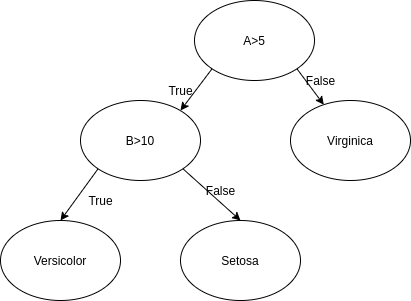
```
Is A>5?
True Branch
  Is B>10?
  True Branch
    Versicolor
  Is B>10?
  False Branch
    Setosa
Is A>5?
False Branch
	Virginica

```




In [44]:
dt_classfier = MyDecisionTree(df_train, split_metric=metric, max_depth=3, min_samples=10)
dt_preds_train = dt_classfier.decisionTreePredictions(df_train)
acc_train = calculateAccuracy(edt_preds_train, df_train.iloc[:, -1]) * 100
edt_preds_test = dt_classfier.decisionTreePredictions(df_test)
acc_test = calculateAccuracy(edt_preds_test, df_test.iloc[:, -1]) * 100
print("Train acc = {0:.2f}%, ".format(acc_train), end = " ")
print("Test acc = {0:.2f}% ".format(acc_test), end = "\n\n")
dt_classfier.showDecisionTree()

Train acc = 96.78%,  Test acc = 92.86% 

Is UCSize <= 2.5?
True Branch
  Is NN <= 3.5?
  True Branch
    Is BN <= 5.5?
    True Branch
      Benign
    IsBN <= 5.5?
    False Branch
      Malignant
  IsNN <= 3.5?
  False Branch
    Malignant
IsUCSize <= 2.5?
False Branch
  Is UCShape <= 2.5?
  True Branch
    Is CT <= 5.5?
    True Branch
      Benign
    IsCT <= 5.5?
    False Branch
      Malignant
  IsUCShape <= 2.5?
  False Branch
    Malignant


4. Experiment with removing features that are redundant, highly correlated with other features and report accuracies of the resulting model. Explain your approach.

First, we check if any attribute is not correlated with the Diagnosis attribute and remove that column. Eg. Mitoses

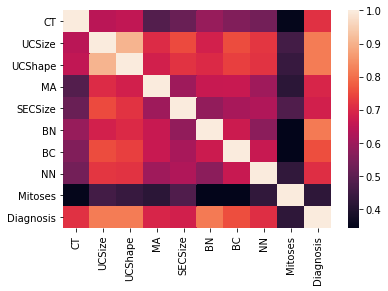

In [134]:
X = data
corr = X.corr()
sns.heatmap(corr)

Now we check the correlation between each pair of attributes except Dignosis. From the pair whose correlation is very high, we frop one of the attribute.

All available features:
   CT  UCSize  UCShape  MA  SECSize    BN  BC  NN
0   5       1        1   1        2   1.0   3   1
1   5       4        4   5        7  10.0   3   2
2   3       1        1   1        2   2.0   3   1
3   6       8        8   1        3   4.0   3   7
4   4       1        1   3        2   1.0   3   1
Selected features:
Index(['CT', 'UCSize', 'MA', 'SECSize', 'BN', 'BC', 'NN'], dtype='object') (699, 7)


,CT,UCSize,MA,SECSize,BN,BC,NN
0,5,1,1,2,1.0,3,1
1,5,4,5,7,10.0,3,2
2,3,1,1,2,2.0,3,1
3,6,8,1,3,4.0,3,7
4,4,1,3,2,1.0,3,1


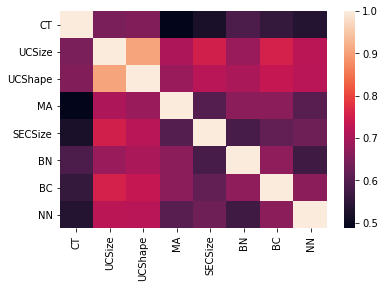

In [135]:
X = data.drop(labels='Diagnosis', axis=1).drop('Mitoses',axis=1)

print('All available features:')
print(X.head())

corr = X.corr()
sns.heatmap(corr)

cols = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if cols[j]:
                cols[j] = False
selected_cols = X.columns[cols]
redc_data = data[selected_cols]

print('Selected features:')
print(selected_cols,redc_data.shape)
display(redc_data.head())

In [136]:
redc_df_train, redc_df_test = splitTrainTest(redc_data, test_size=0.20)
# display(redc_df_train.head())

metrics = ['entropy', 'gini', 'misclass_rate']

for metric in metrics:
    print("\n******** split_metric :",metric,'*********')
    i = 1
    acc_train = 0
    train_acc_rep = 0
    prev_acc_train = 0
    while acc_train<100 and train_acc_rep<2:
        mrdt_classfier = MyDecisionTree(redc_df_train, split_metric=metric, max_depth=i, min_samples=8)
        dt_preds_train = mrdt_classfier.decisionTreePredictions(redc_df_train)
        acc_train = calculateAccuracy(dt_preds_train, redc_df_train.iloc[:, -1]) * 100
        dt_preds_test = mrdt_classfier.decisionTreePredictions(redc_df_test)
        acc_test = calculateAccuracy(dt_preds_test, redc_df_test.iloc[:, -1]) * 100
        print("maxDepth = {}: ".format(i), end = " ")
        print("Train acc = {0:.2f}%, ".format(acc_train), end = " ")
        print("Test acc = {0:.2f}%, ".format(acc_test), end = "\n")
        if prev_acc_train==acc_train:
            train_acc_rep += 1
        else:
            train_acc_rep = 0
        prev_acc_train = acc_train
        i += 1


******** split_metric : entropy *********
maxDepth = 1:  Train acc = 64.04%,  Test acc = 60.71%, 
maxDepth = 2:  Train acc = 67.98%,  Test acc = 67.14%, 
maxDepth = 3:  Train acc = 69.05%,  Test acc = 67.14%, 
maxDepth = 4:  Train acc = 71.38%,  Test acc = 65.71%, 
maxDepth = 5:  Train acc = 73.17%,  Test acc = 64.29%, 
maxDepth = 6:  Train acc = 76.21%,  Test acc = 64.29%, 
maxDepth = 7:  Train acc = 76.57%,  Test acc = 62.14%, 
maxDepth = 8:  Train acc = 76.92%,  Test acc = 62.14%, 
maxDepth = 9:  Train acc = 78.00%,  Test acc = 61.43%, 
maxDepth = 10:  Train acc = 78.35%,  Test acc = 60.71%, 
maxDepth = 11:  Train acc = 78.71%,  Test acc = 60.00%, 
maxDepth = 12:  Train acc = 78.71%,  Test acc = 60.00%, 
maxDepth = 13:  Train acc = 78.71%,  Test acc = 60.00%, 

******** split_metric : gini *********
maxDepth = 1:  Train acc = 64.04%,  Test acc = 60.71%, 
maxDepth = 2:  Train acc = 67.98%,  Test acc = 67.14%, 
maxDepth = 3:  Train acc = 69.95%,  Test acc = 67.14%, 
maxDepth = 4:  Tr

5. Report the advantages and disadvantages of decision trees based on the above question.

Answer:

Advantages:  
1) Decision tree is not affected by the scale of the data  
2) It is very inuitive and transparent as we can see how the tree is formed  
3) It does not require much data preprocessing, even some amount of missing values does not affect the tree  
4) Decision tree can be used for both classification and regression problems  
5) It can handle both continuous and categorical variables  
6) It requires less training time  
7) It can model non-linearity in data  
  
Disadvantages:  
1) Decision trees overfit the data easily. So proper techniques should be used to avoid this - pruning, max-depth, min-samples  
2) They are unstable, which means adding a new datapoint can change the structure of the tree  
3) If the dataset size is very large and has many dimensions then decision trees would lead to poor performance  
4) Wrong decision tree would be generated if some data is noisy  
5) Reproducibility of decision tree model is highly sensitive as small change in the data can result in large change in the tree structure  
6) Decision tree follows greedy approch so may not lead to ideal splits

